# 1- Import Libraries

In [12]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# 2- Call Datasets

In [13]:
Data1 = pd.read_csv("C:/Users/big_j/PycharmProjects/MentalHealthDataPipeline/data/1- mental-illnesses-prevalence.csv")
Data2 = pd.read_csv("C:/Users/big_j/PycharmProjects/MentalHealthDataPipeline/data/4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv")
Data3 = pd.read_csv("C:/Users/big_j/PycharmProjects/MentalHealthDataPipeline/data/6- depressive-symptoms-across-us-population.csv")
Data4 = pd.read_csv("C:/Users/big_j/PycharmProjects/MentalHealthDataPipeline/data/7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv")

In [14]:
df1 = pd.DataFrame(Data1)
df2 = pd.DataFrame(Data2)
df3 = pd.DataFrame(Data3)
df4 = pd.DataFrame(Data4)

# 3- Functional Describe of All Datasets

In [15]:
def describe(df):
    
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })    
        
    return output

In [16]:
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# 4- Output of Describes

In [17]:
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df1 : Mental illness dataframe"' + color.END)
print(describe(df1))
print("\n")
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df2 : Adult population, mental illnesses"' + color.END)
print(describe(df2))
print("\n")
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df3 : Depressive"' + color.END)
print(describe(df3))
print("\n")
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df4 : Number of countries"' + color.END)
print(describe(df4))

"The describe table of df1 : Mental illness dataframe"
                                            variable    dtype  count  unique  \
0                                             Entity   object   6420     214   
1                                               Code   object   6420     206   
2                                               Year    int64   6420      30   
3  Schizophrenia disorders (share of population) ...  float64   6420    6406   
4  Depressive disorders (share of population) - S...  float64   6420    6416   
5  Anxiety disorders (share of population) - Sex:...  float64   6420    6417   
6  Bipolar disorders (share of population) - Sex:...  float64   6420    6385   
7  Eating disorders (share of population) - Sex: ...  float64   6420    6417   

   missing value  
0              0  
1            270  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  


"The describe table of df2 : Adult population, ment

# 5- Some Visualizations with Plotly

In [18]:
df2.sort_values(by= "Major depression" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Major depression", y="Entity", orientation='h',color='Bipolar disorder')
fig.show()

<Figure size 1280x960 with 0 Axes>

In [19]:
df2.sort_values(by= "Eating disorders" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Eating disorders", y="Entity", orientation='h',color='Dysthymia')
fig.show()

<Figure size 1280x960 with 0 Axes>

In [20]:
df2.replace(to_replace="<0.1", value=0.1, regex=True, inplace=True)

In [21]:
df2['Schizophrenia'] = df2['Schizophrenia'].astype(float)

In [22]:
df2.sort_values(by= "Schizophrenia" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Schizophrenia", y="Entity", orientation='h',color='Anxiety disorders')
fig.show()

<Figure size 1280x960 with 0 Axes>

# 6- Amazing Dynamik Subplot with Plotly and go

In [23]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

x1 = ["Andean Latin America", "West Sub-Saharan Africa", "Tropical Latin America", "Central Asia", "Central Europe",
    "Central Sub-Saharan Africa", "Southern Latin America", "North Africa/Middle East", "Southern Sub-Saharan Africa",
    "Southeast Asia", "Oceania", "Central Latin America", "Eastern Europe", "South Asia", "East Sub-Saharan Africa",
    "Western Europe", "World", "East Asia", "Caribbean", "Asia Pacific", "Australasia", "North America"]

fig.append_trace(go.Bar(
    x=df2["Bipolar disorder"],
    y=x1,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(20, 10, 56, 1.0)',
            width=0),
    ),
    name='Bipolar disorder in Mental Health',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=df2["Major depression"], y=x1,
    mode='lines+markers',
    line_color='rgb(40, 0, 128)',
    name='Major depression in Mental Health',
), 1, 2)

fig.update_layout(
    title='Major depression and Bipolar disorder',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=5,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.45],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=10000,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []


# Adding labels
for ydn, yd, xd in zip(df2["Major depression"], df2["Bipolar disorder"], x1):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn+10,
                            text='{:,}'.format(ydn) + '%',
                            font=dict(family='Arial', size=10,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd+10 ,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=10,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.2, y=-0.109,
                        text="Mental health visualization",
                        font=dict(family='Arial', size=20, color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

# 7- Multiple Analysis

In [24]:
x = ["Appetite change", "Average across symptoms", "Depressed mood", "Difficulty concentrating", "Loss of interest",
    "Low energy", "Low self-esteem", "Psychomotor agitation", "Psychomotor agitation", "Sleep problems", "Suicidal ideation"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=df3["Nearly every day"], name='Nearly every day',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=x, y=df3["More than half the days"], name = 'More than half the days',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=x, y=df3["Several days"], name='Several days',
                         line=dict(color='black', width=4,
                              dash='dashdot') # dash options include 'dash', 'dot', and 'dashdot'
))

# Edit the layout
fig.update_layout(title='Depressive symptoms across us population',
                   xaxis_title='Entity',
                   yaxis_title='Types of days')


fig.show()

In [25]:
x = ["Alcohol use disorders", "Amphetamine use disorders", "Anorexia nervosa", "Anxiety disorders",
     "Attention-deficit hyperactivity disorder", "Autism spectrum disorders", "Bipolar disorder",
     "Bulimia nervosa", "Cannabis use disorders", "Cocaine use disorders", "Dysthymia","Major depressive disorder",
    "Opioid use disorders", "Other drug use disorders", "Personality disorders"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=df4["Number of countries with primary data on prevalence of mental disorders"],
                         name='Nearly every day',
                         line=dict(color='firebrick', width=4)))


# Edit the layout
fig.update_layout(title='mental illnesses in the global burden of disease study',
                   xaxis_title='illnesses',
                   yaxis_title='Number of countries')


fig.show()

# 8- Rename Columns

In [26]:
df1_column_names = list(df1.columns.values)
df1_column_names

['Entity',
 'Code',
 'Year',
 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']

In [27]:
df1 = df1.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders', 
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety disorders',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar disorders',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating disorders'})

In [28]:
df1

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [29]:
df1_variables = df1[["Schizophrenia disorders","Depressive disorders","Anxiety disorders","Bipolar disorders",
                       "Eating disorders"]]

In [30]:
df1_variables

,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,0.223206,4.996118,4.713314,0.703023,0.127700
1,0.222454,4.989290,4.702100,0.702069,0.123256
2,0.221751,4.981346,4.683743,0.700792,0.118844
3,0.220987,4.976958,4.673549,0.700087,0.115089
4,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...
6415,0.201042,3.407624,3.184012,0.538596,0.095652
6416,0.201319,3.410755,3.187148,0.538593,0.096662
6417,0.201639,3.411965,3.188418,0.538589,0.097330
6418,0.201976,3.406929,3.172111,0.538585,0.097909


# 9- Correlation

In [31]:
Corrmat = df1_variables.corr()

<Axes: >

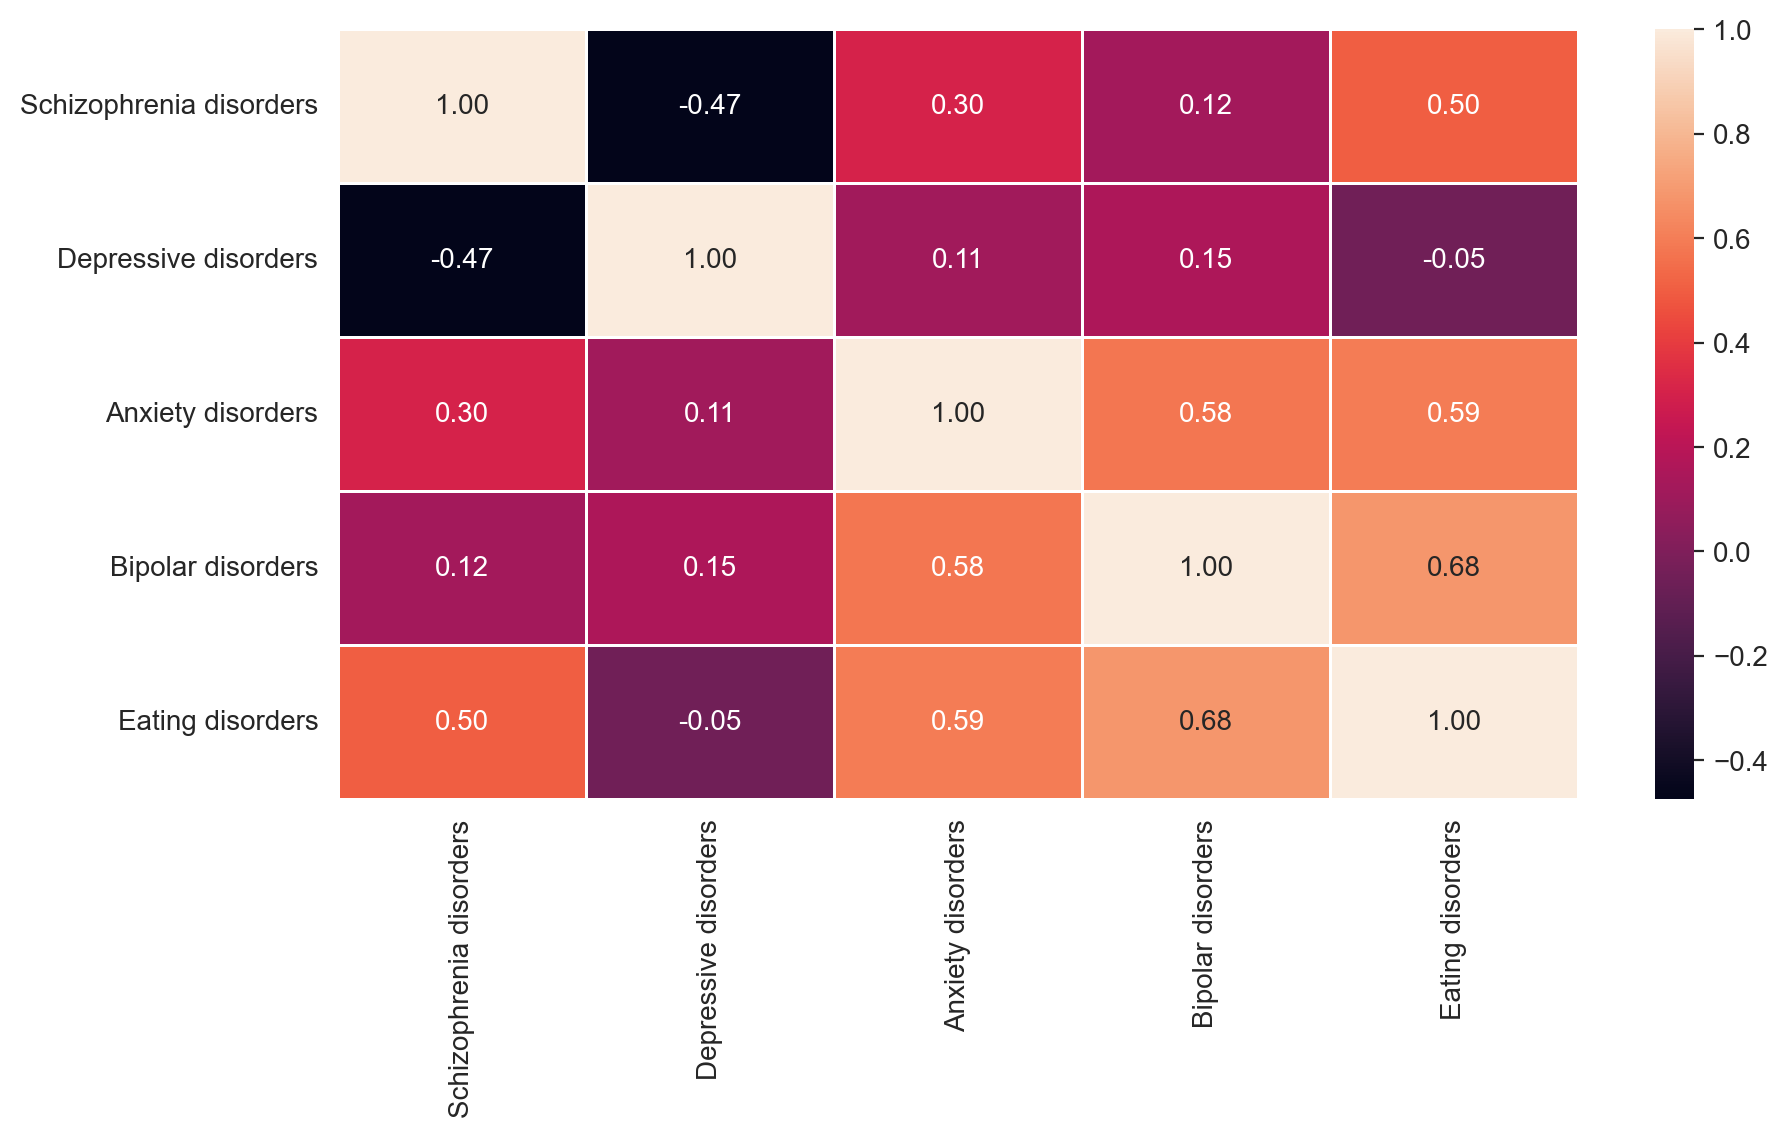

In [32]:
plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

# 10- Scatter and Box plot

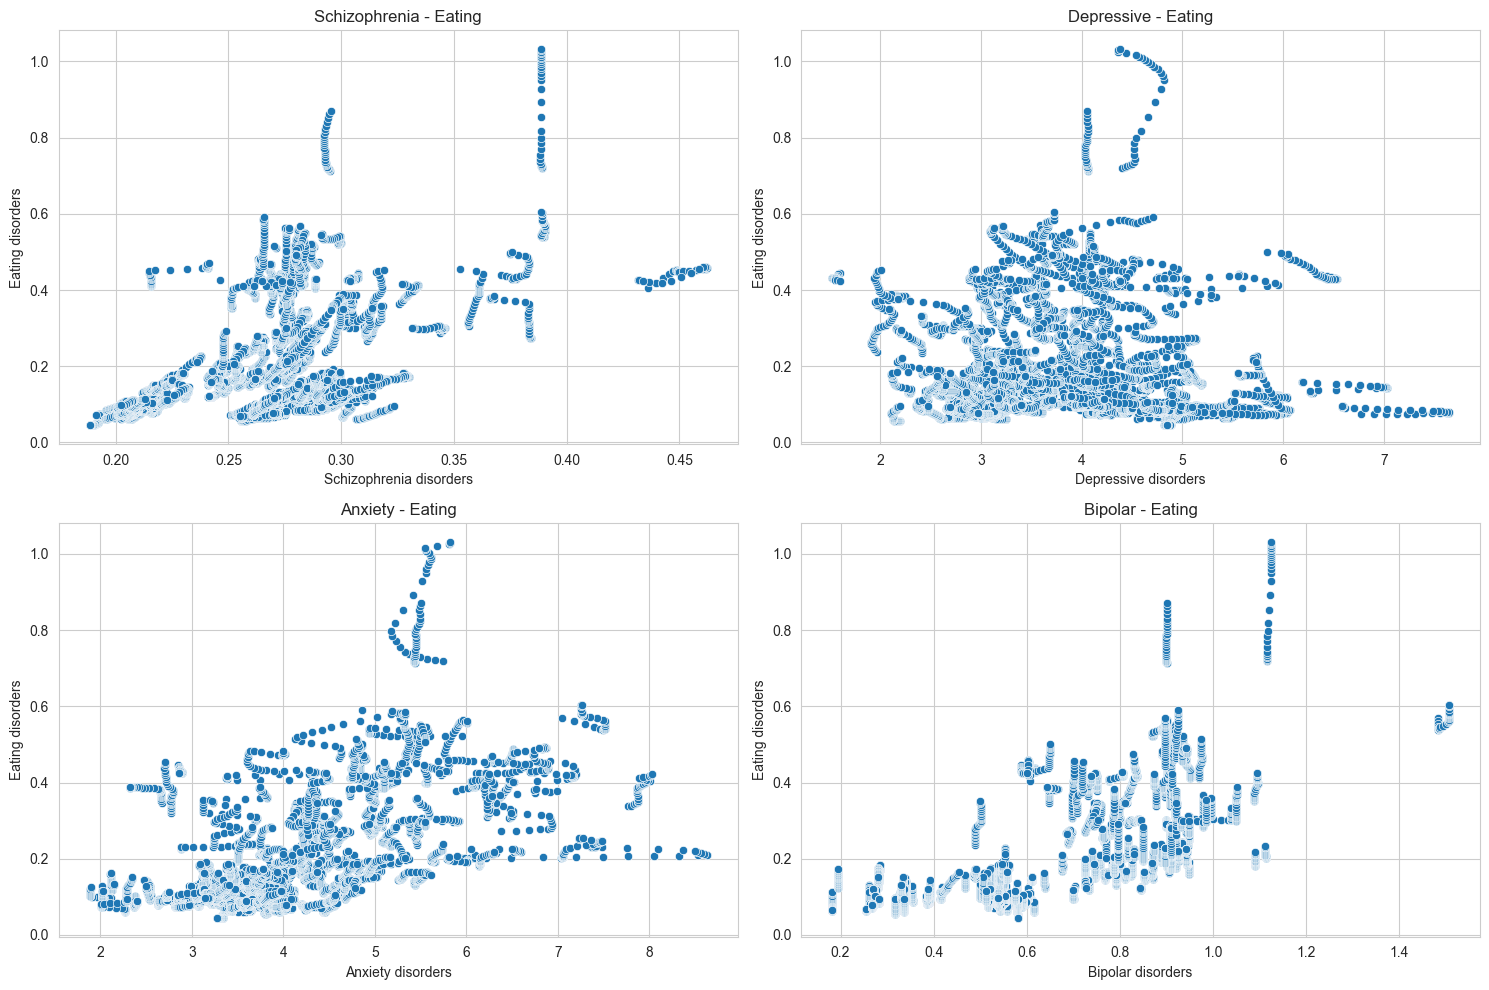

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize= (15,10))

ax1.set_title('Schizophrenia - Eating')
sns.scatterplot(x="Schizophrenia disorders", y="Eating disorders", data=df1_variables, ax=ax1)

ax2.set_title('Depressive - Eating')
sns.scatterplot(x='Depressive disorders', y="Eating disorders", data=df1_variables, ax=ax2)

ax3.set_title('Anxiety - Eating')
sns.scatterplot(x='Anxiety disorders', y="Eating disorders", data=df1_variables, ax=ax3)

ax4.set_title('Bipolar - Eating')
sns.scatterplot(x='Bipolar disorders', y="Eating disorders", data=df1_variables, ax=ax4)

plt.tight_layout()

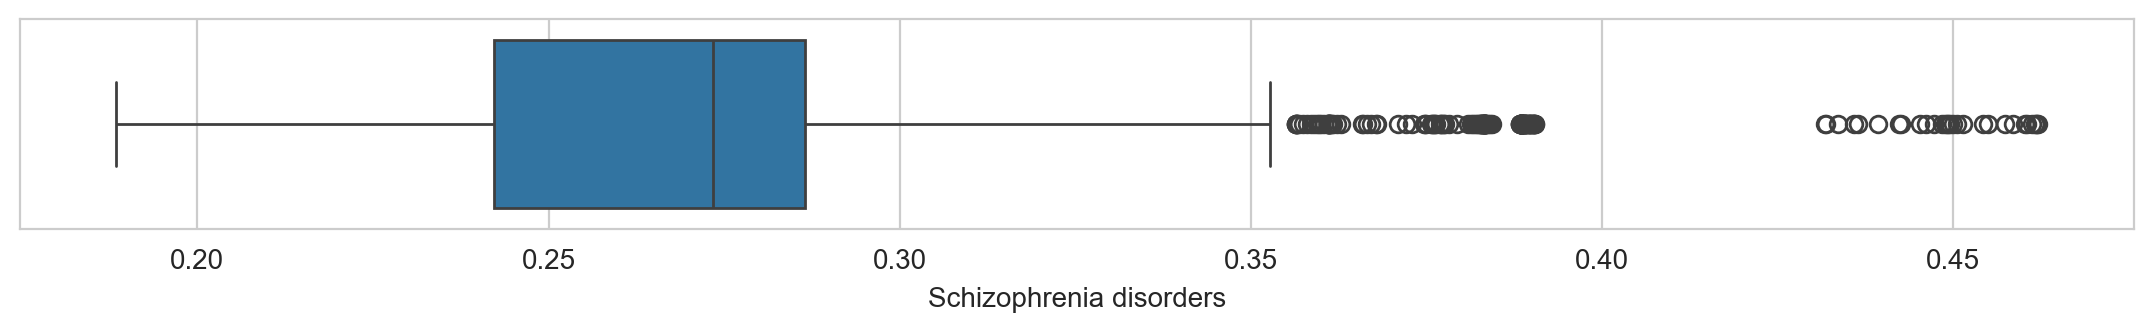

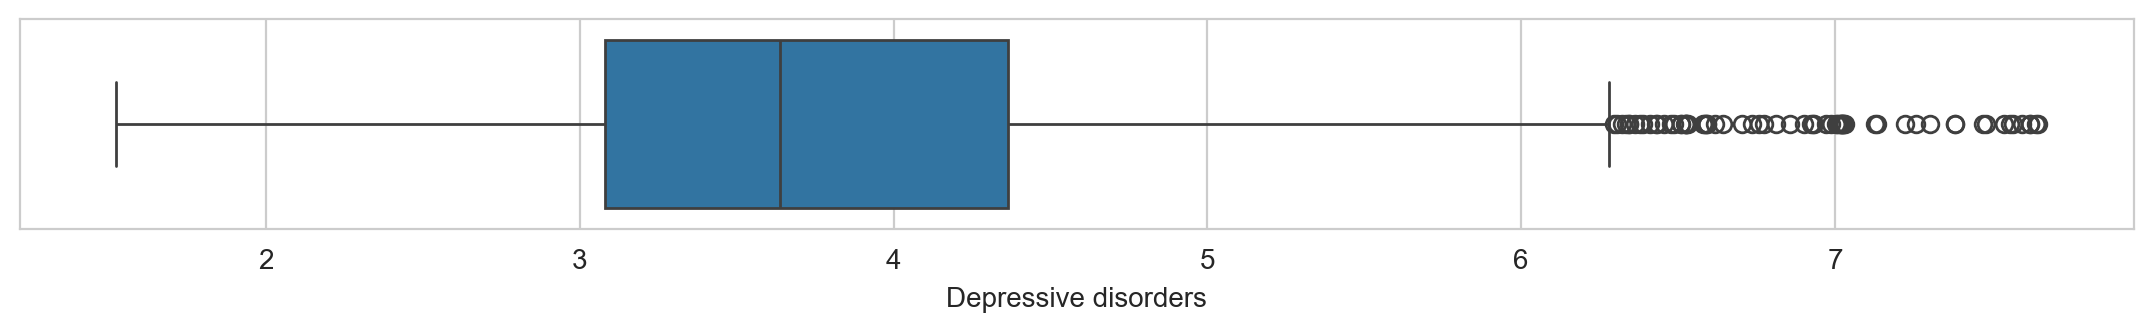

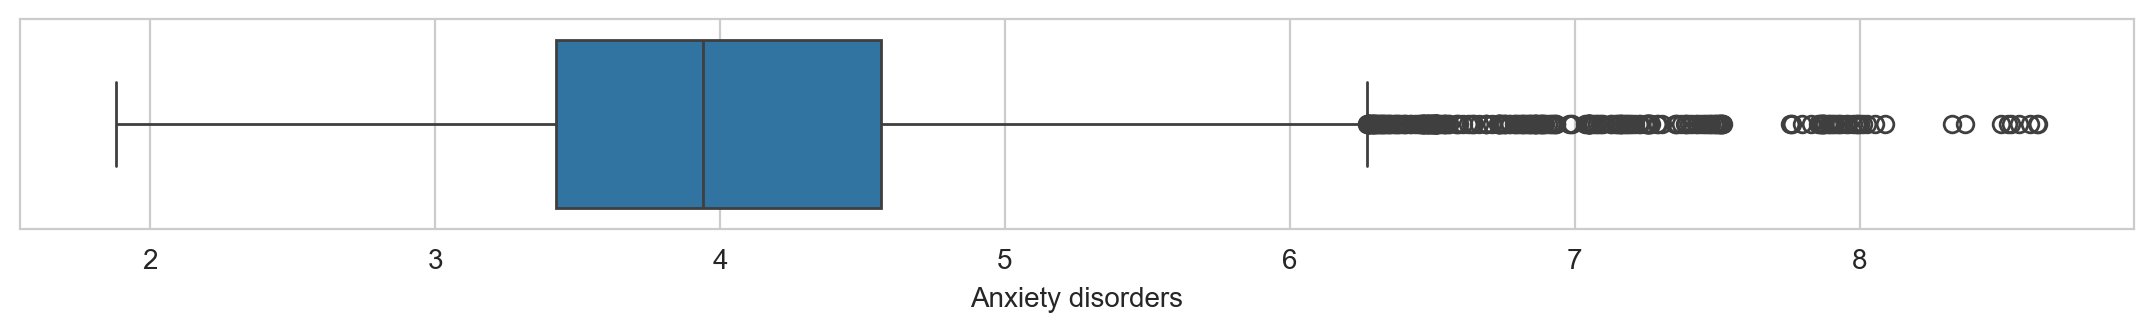

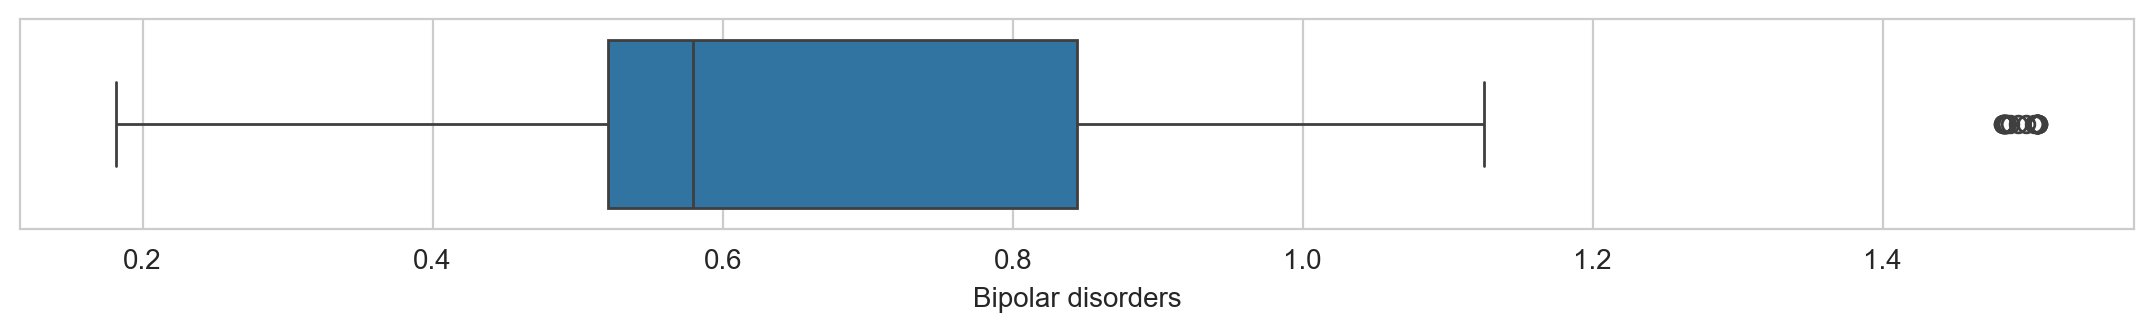

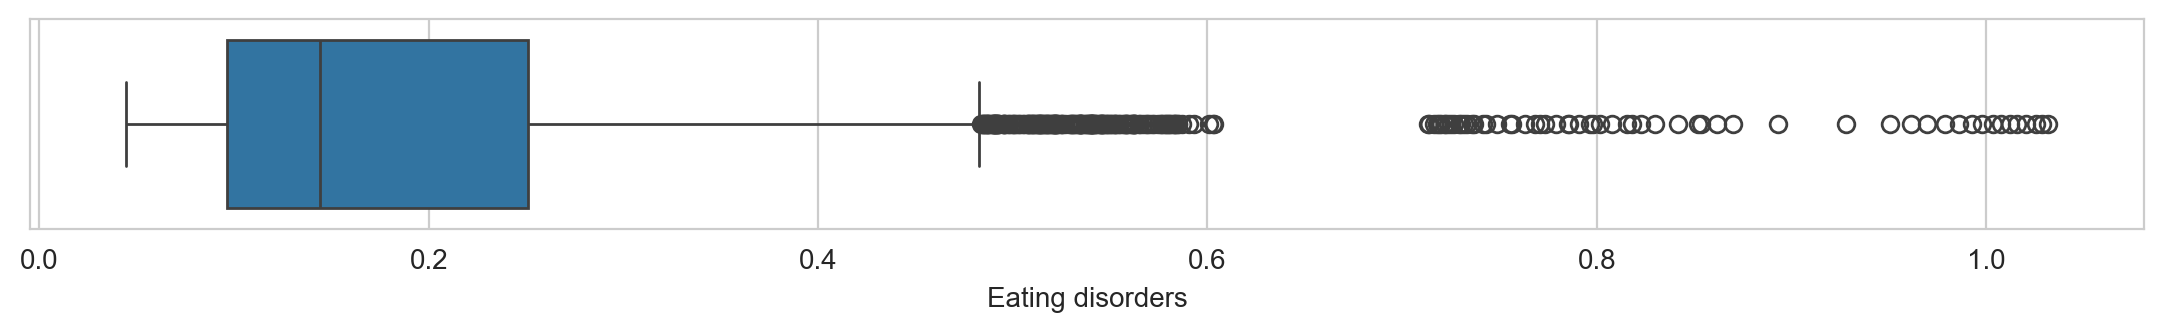

In [34]:
Numerical = ['Schizophrenia disorders', 'Depressive disorders','Anxiety disorders','Bipolar disorders','Eating disorders']
i = 0
while i < 5:
    fig = plt.figure(figsize = [30,3], dpi=200)
    plt.subplot(2,2,1)
    sns.boxplot(x = Numerical[i], data = df1_variables)
    i += 1
    plt.show()

Creat model

# 11- Normalize

In [35]:
features = ['Schizophrenia disorders', 'Depressive disorders','Anxiety disorders','Bipolar disorders']
X_model = df1[features]
y_model = df1["Eating disorders"]

In [36]:
scaler = preprocessing.MinMaxScaler()
X_model_norm = scaler.fit_transform(X_model)

In [37]:
X_model_norm

array([[0.12714204, 0.56728135, 0.42008448, 0.39345779],
       [0.12439376, 0.56616628, 0.41842183, 0.39273757],
       [0.1218262 , 0.56486898, 0.41570011, 0.39177399],
       ...,
       [0.04832425, 0.30858363, 0.19399437, 0.26936249],
       [0.0495569 , 0.30776117, 0.19157658, 0.26935944],
       [0.05140367, 0.30589079, 0.1863733 , 0.26935592]])

# 12- Simple Linear Regression

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_model_norm, y_model, test_size=20, random_state=42)

In [39]:
print("Shape of x_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (6400, 4)
Shape of y_train :  (6400,)
Shape of x_test :  (20, 4)
Shape of y_test :  (20,)


In [40]:
Model = LinearRegression()
Model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = Model.predict(X_test)

In [42]:
print("Mean Absolute Error of Model is: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error of Model is: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared of Model is: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score of Model is: ", metrics.r2_score(y_test,y_pred))

Mean Absolute Error of Model is:  0.08003250281357929
Mean Squared Error of Model is:  0.021786328838461325
Root Mean Squared of Model is:  0.147601926946979
R2 Score of Model is:  0.6289967829652676


In [43]:
k_fold = KFold(10)
print (cross_val_score(Model, X_model_norm, y_model.ravel(), cv=k_fold, n_jobs=1))

[0.67019159 0.30224538 0.34774549 0.6311535  0.62898747 0.59061848
 0.66269011 0.57389516 0.64517085 0.84017723]


# 13- Higher Dimension Linear Regression

In [44]:
def check(Dimension, testsize):
    r2 = 0.6289
    for column in X_model:
        New_Col_name = column + str(Dimension)
        New_Col_value = X_model[column]**Dimension
        X_model.insert(0, New_Col_name, New_Col_value)
        X_train, X_test, y_train, y_test = train_test_split(X_model, y_model,test_size=testsize,random_state=0)
        New_model = LinearRegression()
        New_model.fit(X_train, y_train)
        y_pred = New_model.predict (X_test)
        r2_new = metrics.r2_score(y_test, y_pred)
        if r2_new < r2:
            X_model.drop([New_Col_name], axis=1, inplace=True)
        else:
            r2 = r2_new
            
    print("R2 score is: ", r2)
check(2,0.2)

R2 score is:  0.6554298773488342


In [45]:
X_model

,Bipolar disorders2,Anxiety disorders2,Depressive disorders2,Schizophrenia disorders2,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders
0,0.494242,22.215329,24.961195,0.049821,0.223206,4.996118,4.713314,0.703023
1,0.492901,22.109744,24.893013,0.049486,0.222454,4.989290,4.702100,0.702069
2,0.491109,21.937448,24.813805,0.049174,0.221751,4.981346,4.683743,0.700792
3,0.490122,21.842057,24.770114,0.048835,0.220987,4.976958,4.673549,0.700087
4,0.489857,21.816466,24.778314,0.048481,0.220183,4.977782,4.670810,0.699898
...,...,...,...,...,...,...,...,...
6415,0.290085,10.137934,11.611901,0.040418,0.201042,3.407624,3.184012,0.538596
6416,0.290082,10.157910,11.633250,0.040529,0.201319,3.410755,3.187148,0.538593
6417,0.290078,10.166010,11.641508,0.040658,0.201639,3.411965,3.188418,0.538589
6418,0.290074,10.062288,11.607165,0.040794,0.201976,3.406929,3.172111,0.538585


# 14- Dot Model

In [46]:
Bipolar_Anx = X_model["Bipolar disorders"]*X_model["Anxiety disorders"]
Bipolar_Anx2 = X_model["Bipolar disorders2"]*X_model["Anxiety disorders2"]
Dep_Schi = X_model["Depressive disorders"]* X_model["Schizophrenia disorders"]
Dep_Schi2 = X_model["Depressive disorders2"]* X_model["Schizophrenia disorders2"]

In [47]:
X_model.insert(0, "Bipolar_Anx", Bipolar_Anx)
X_model.insert(0, "Bipolar_Anx2", Bipolar_Anx2)
X_model.insert(0, "Dep_Schi", Dep_Schi)
X_model.insert(0, "Dep_Schi2", Dep_Schi2)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model,test_size=0.2,random_state=0)
Model = LinearRegression()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
r2

0.6779169482589391

# 15- Display Model's Output

In [49]:
a = X_test["Bipolar disorders"]
b = y_test
c = X_test["Bipolar disorders"]
d = y_pred

In [50]:
font1 = {'family':'fantasy','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':20}
font3 = {'family':'cursive','color':'green','size':20}

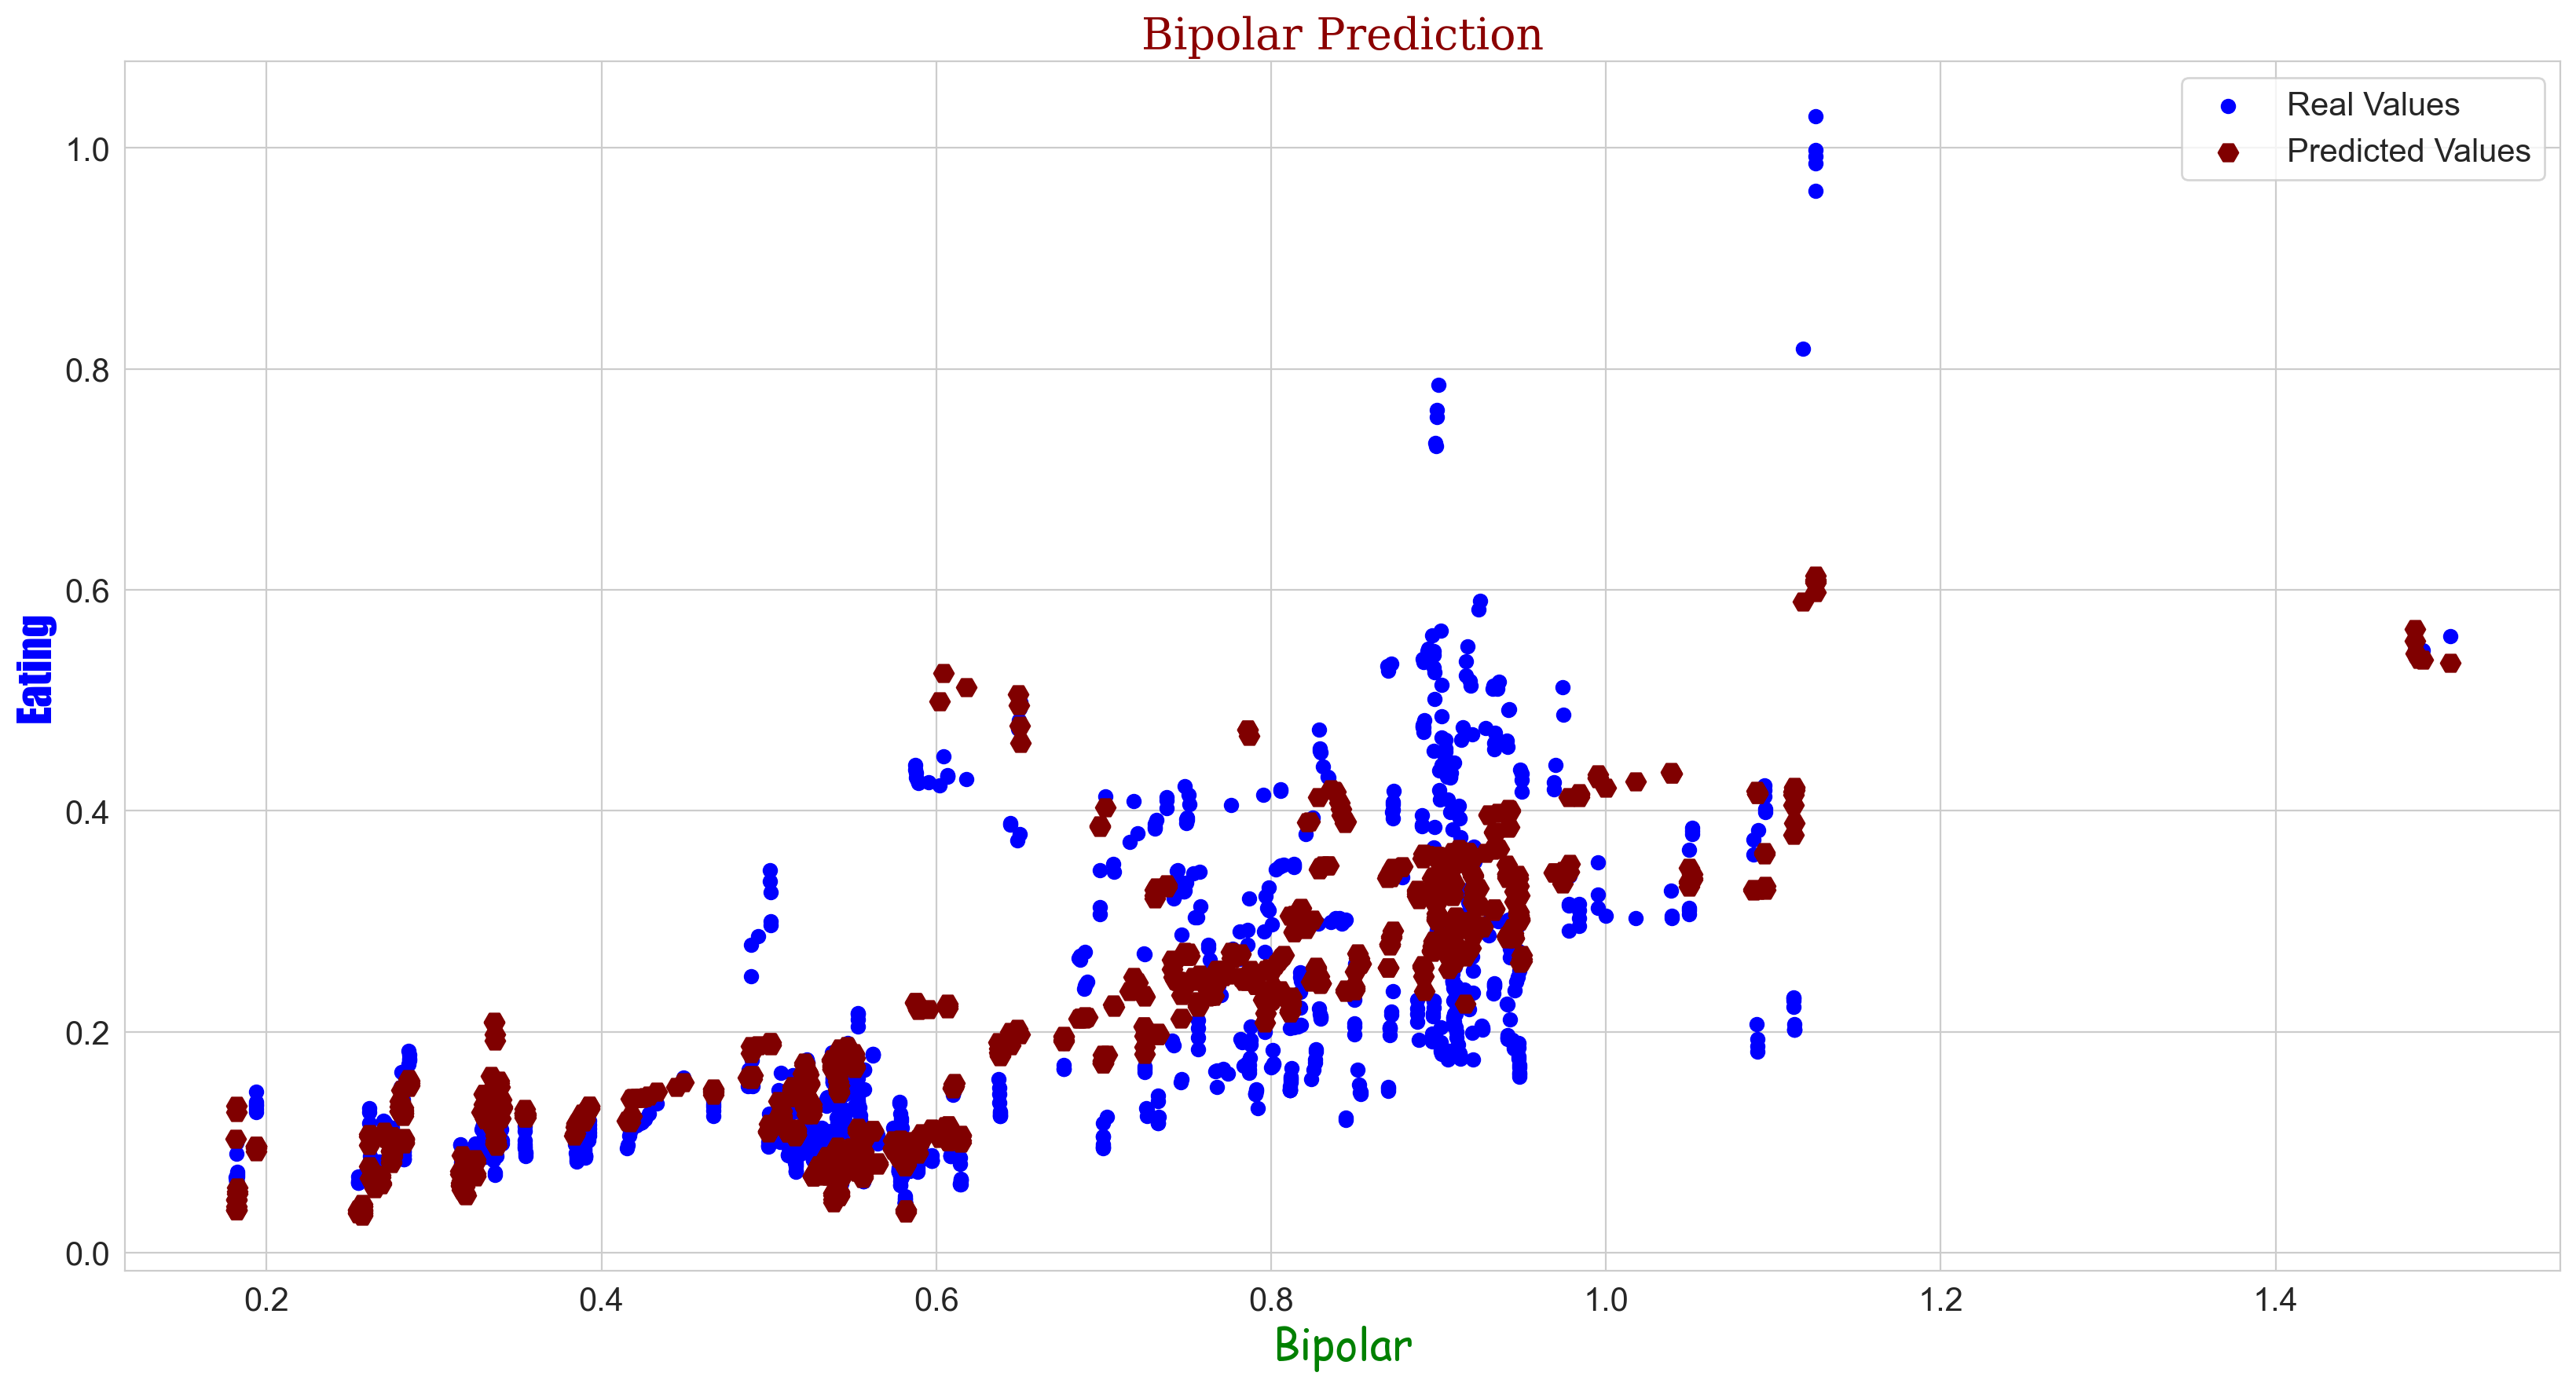

In [51]:
plt.figure(figsize= (20,10), dpi=200)
plt.title("Bipolar Prediction",fontdict=font2)
plt.xlabel("Bipolar",fontdict= font3)
plt.ylabel("Eating",fontdict=font1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a,b, color = 'blue', label = "Real Values")
plt.scatter(c,d, color = 'maroon', label = "Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
plt.show()

In [52]:
a1 = X_test["Schizophrenia disorders"]
b1 = y_test
c1 = X_test["Schizophrenia disorders"]
d1 = y_pred

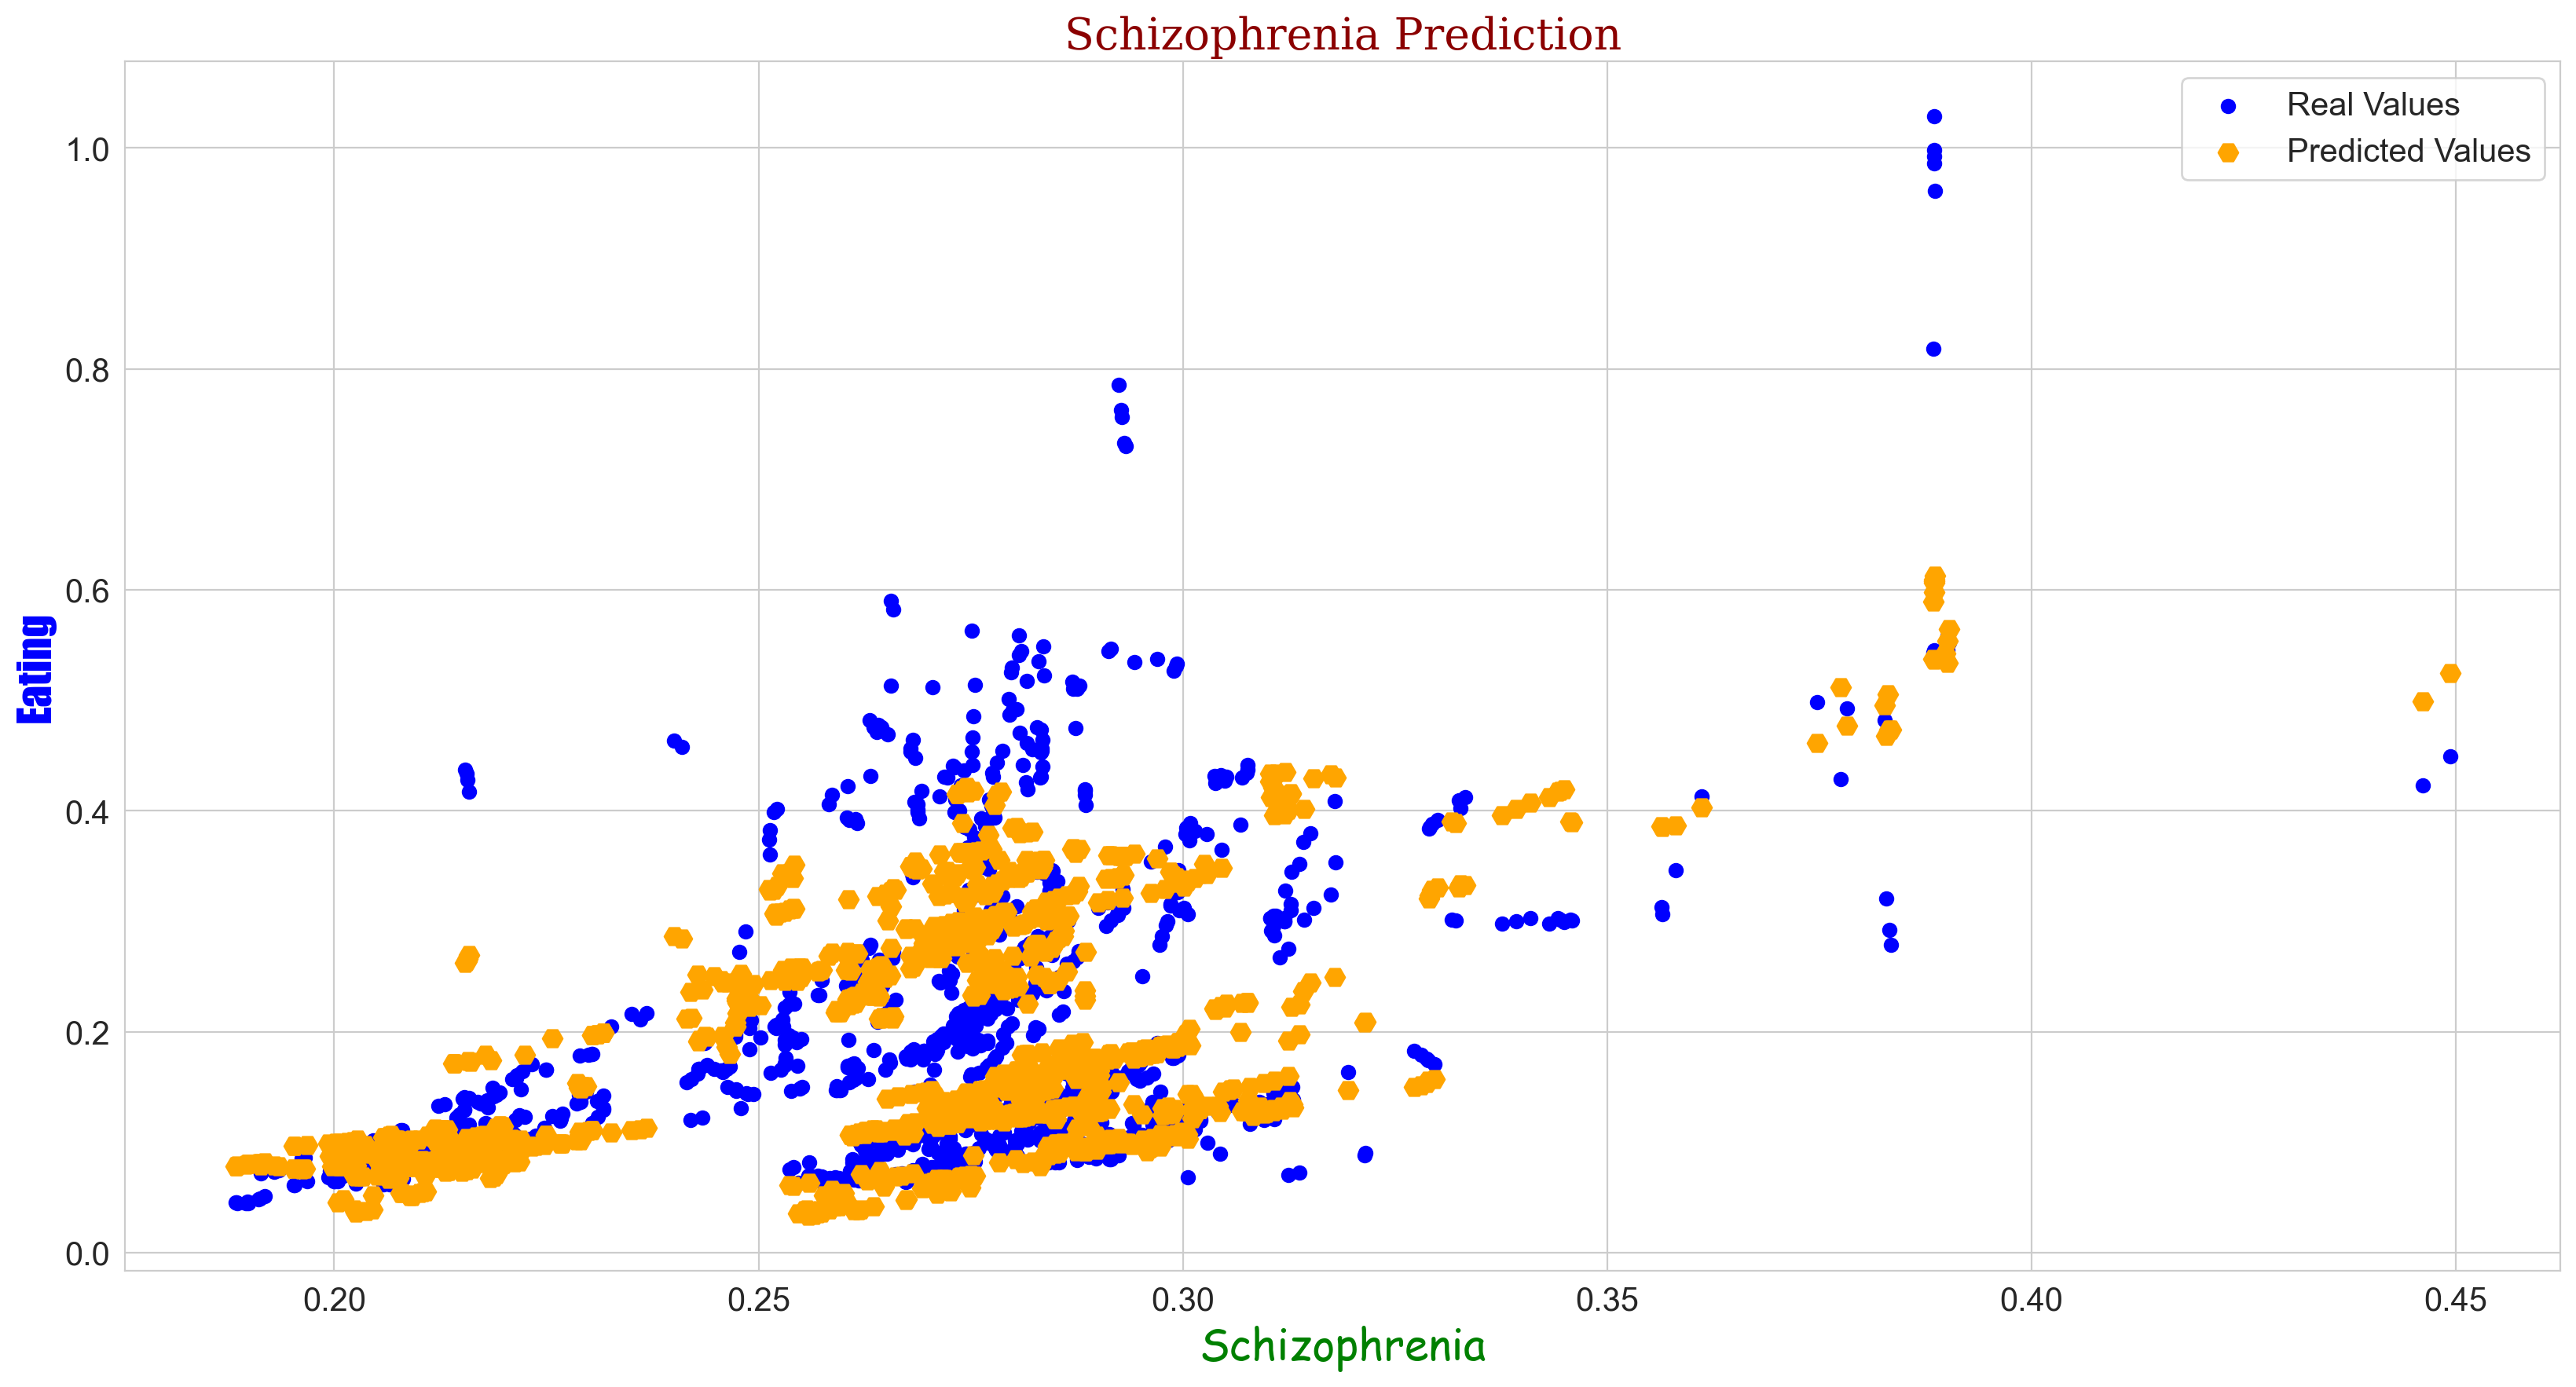

In [53]:
plt.figure(figsize= (20,10), dpi=200)
plt.title("Schizophrenia Prediction",fontdict=font2)
plt.xlabel("Schizophrenia",fontdict= font3)
plt.ylabel("Eating",fontdict=font1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a1,b1, color = 'blue', label = "Real Values")
plt.scatter(c1,d1, color = 'Orange', label = "Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
plt.show()

In [54]:
a2 = X_test["Anxiety disorders"]
b2 = y_test
c2 = X_test["Anxiety disorders"]
d2 = y_pred

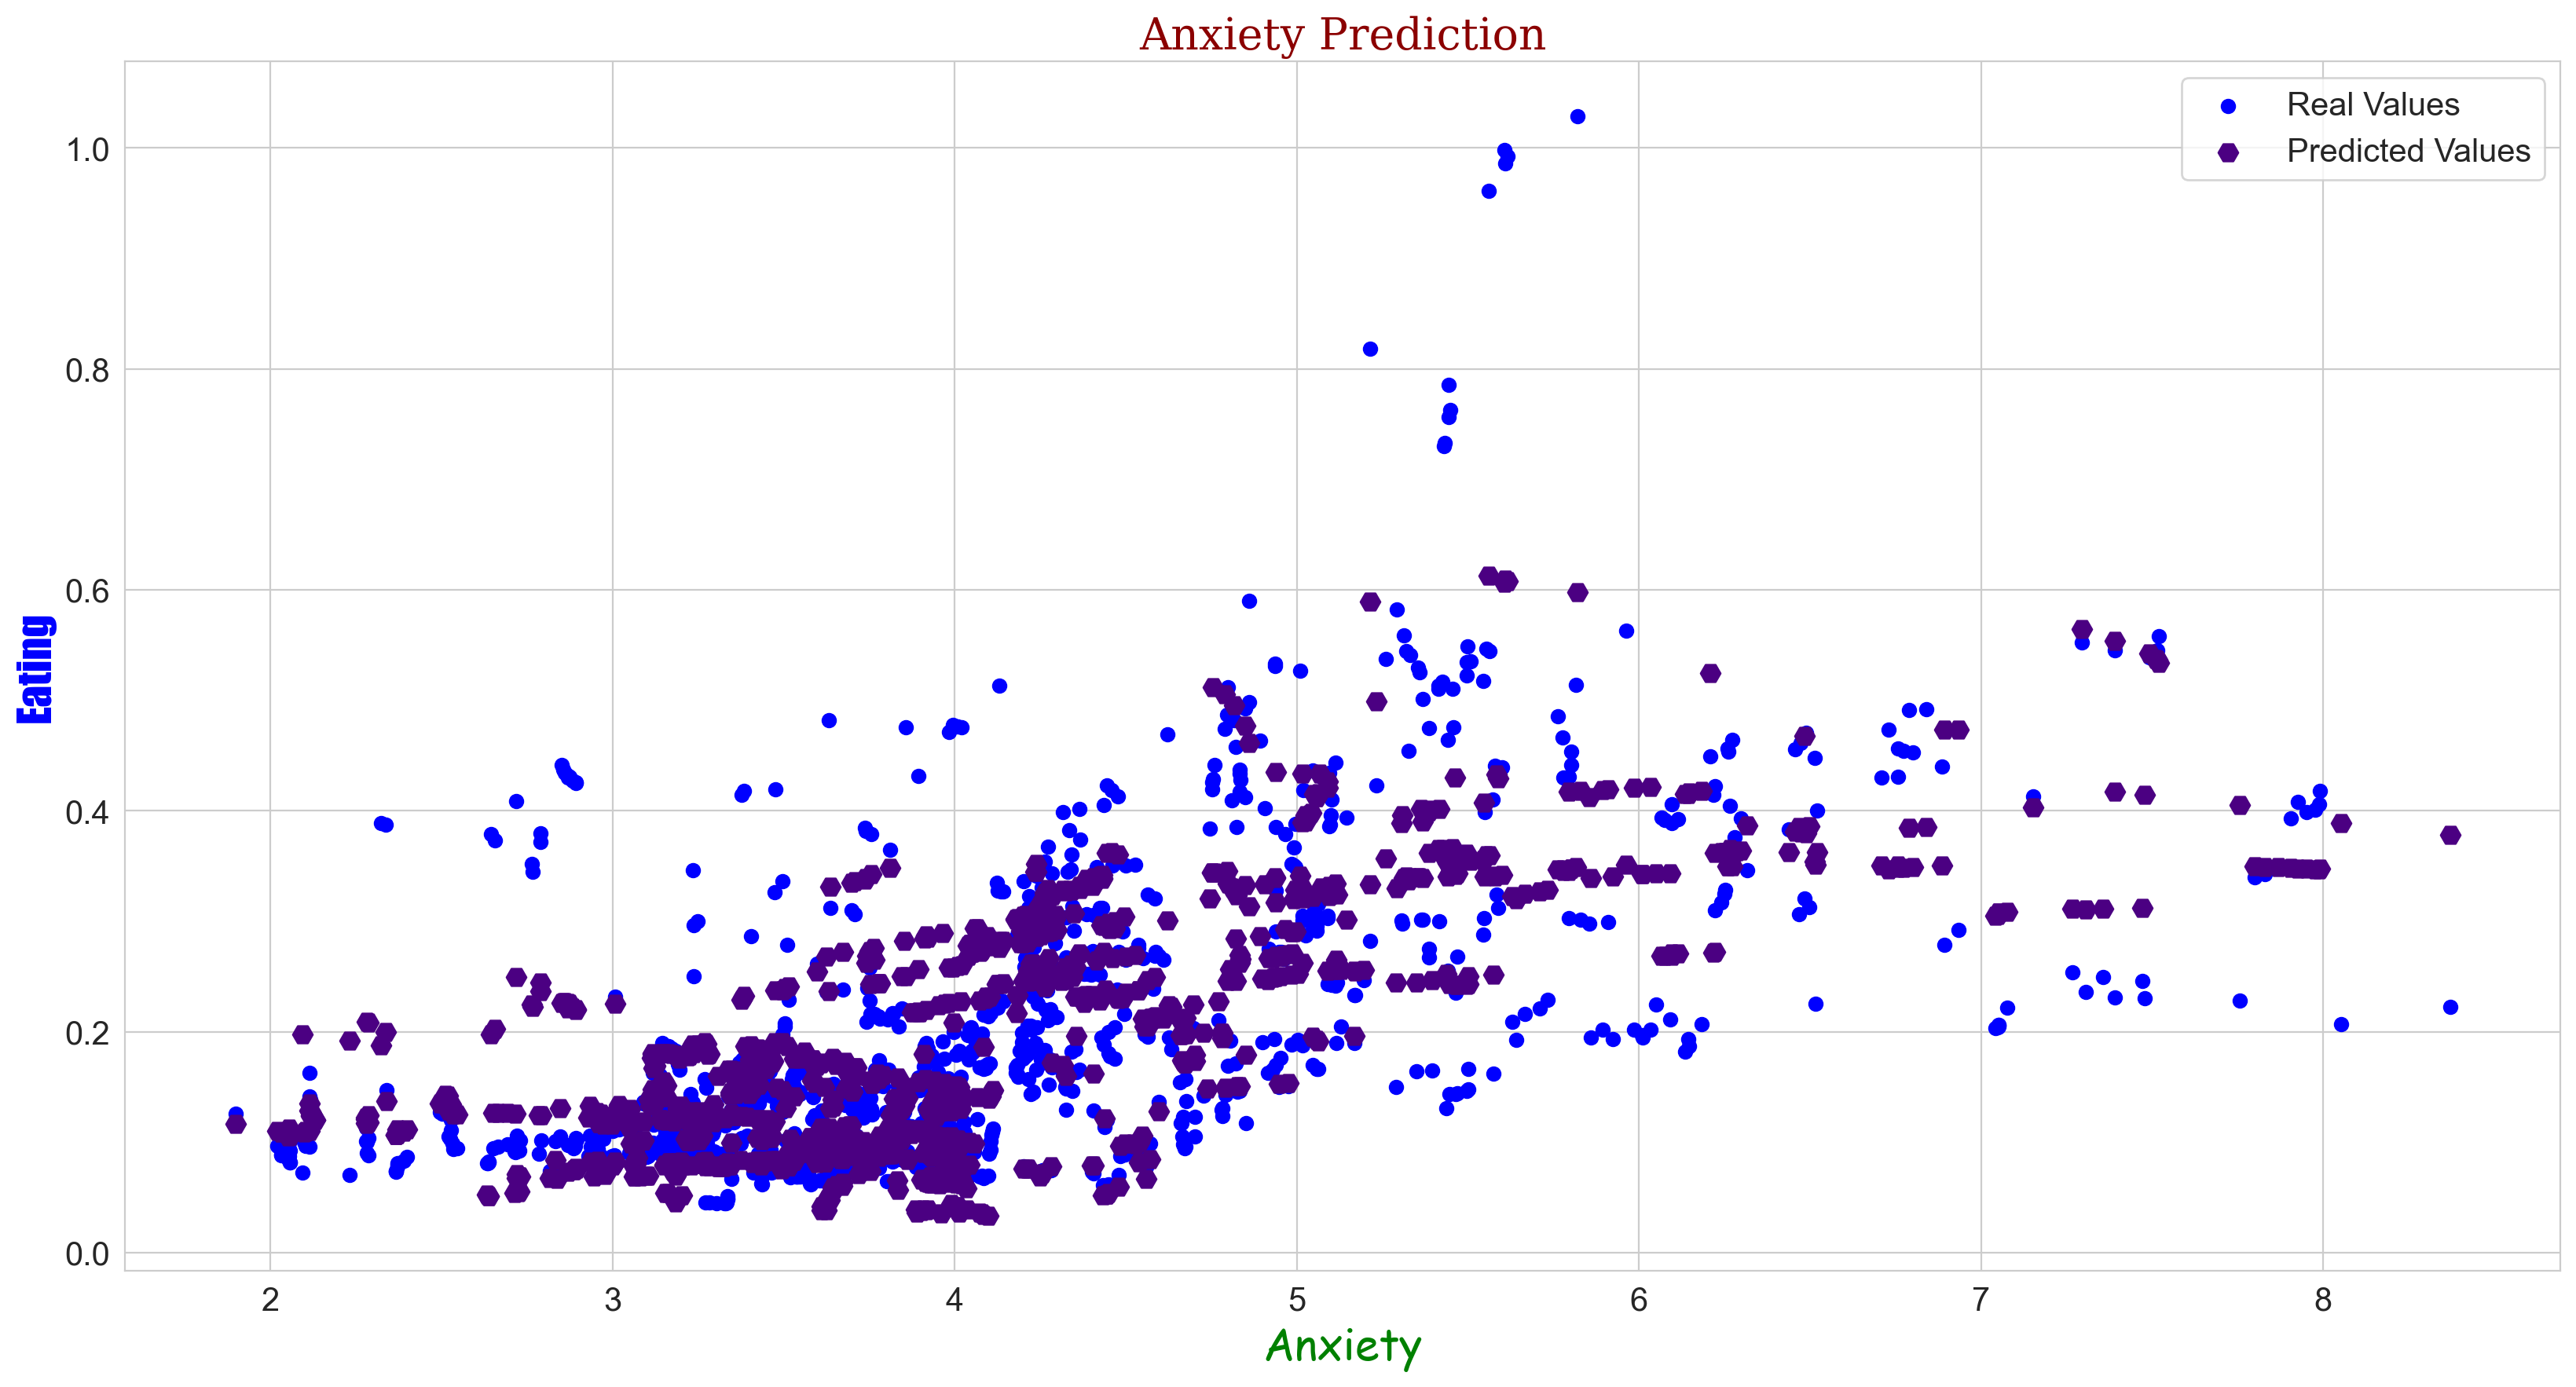

In [55]:
plt.figure(figsize= (20,10), dpi=200)
plt.title("Anxiety Prediction",fontdict=font2)
plt.xlabel("Anxiety",fontdict= font3)
plt.ylabel("Eating",fontdict=font1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a2,b2, color = 'blue', label = "Real Values")
plt.scatter(c2,d2, color = 'indigo', label = "Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
plt.show()

In [56]:
a3 = X_test["Depressive disorders"]
b3 = y_test
c3 = X_test["Depressive disorders"]
d3 = y_pred

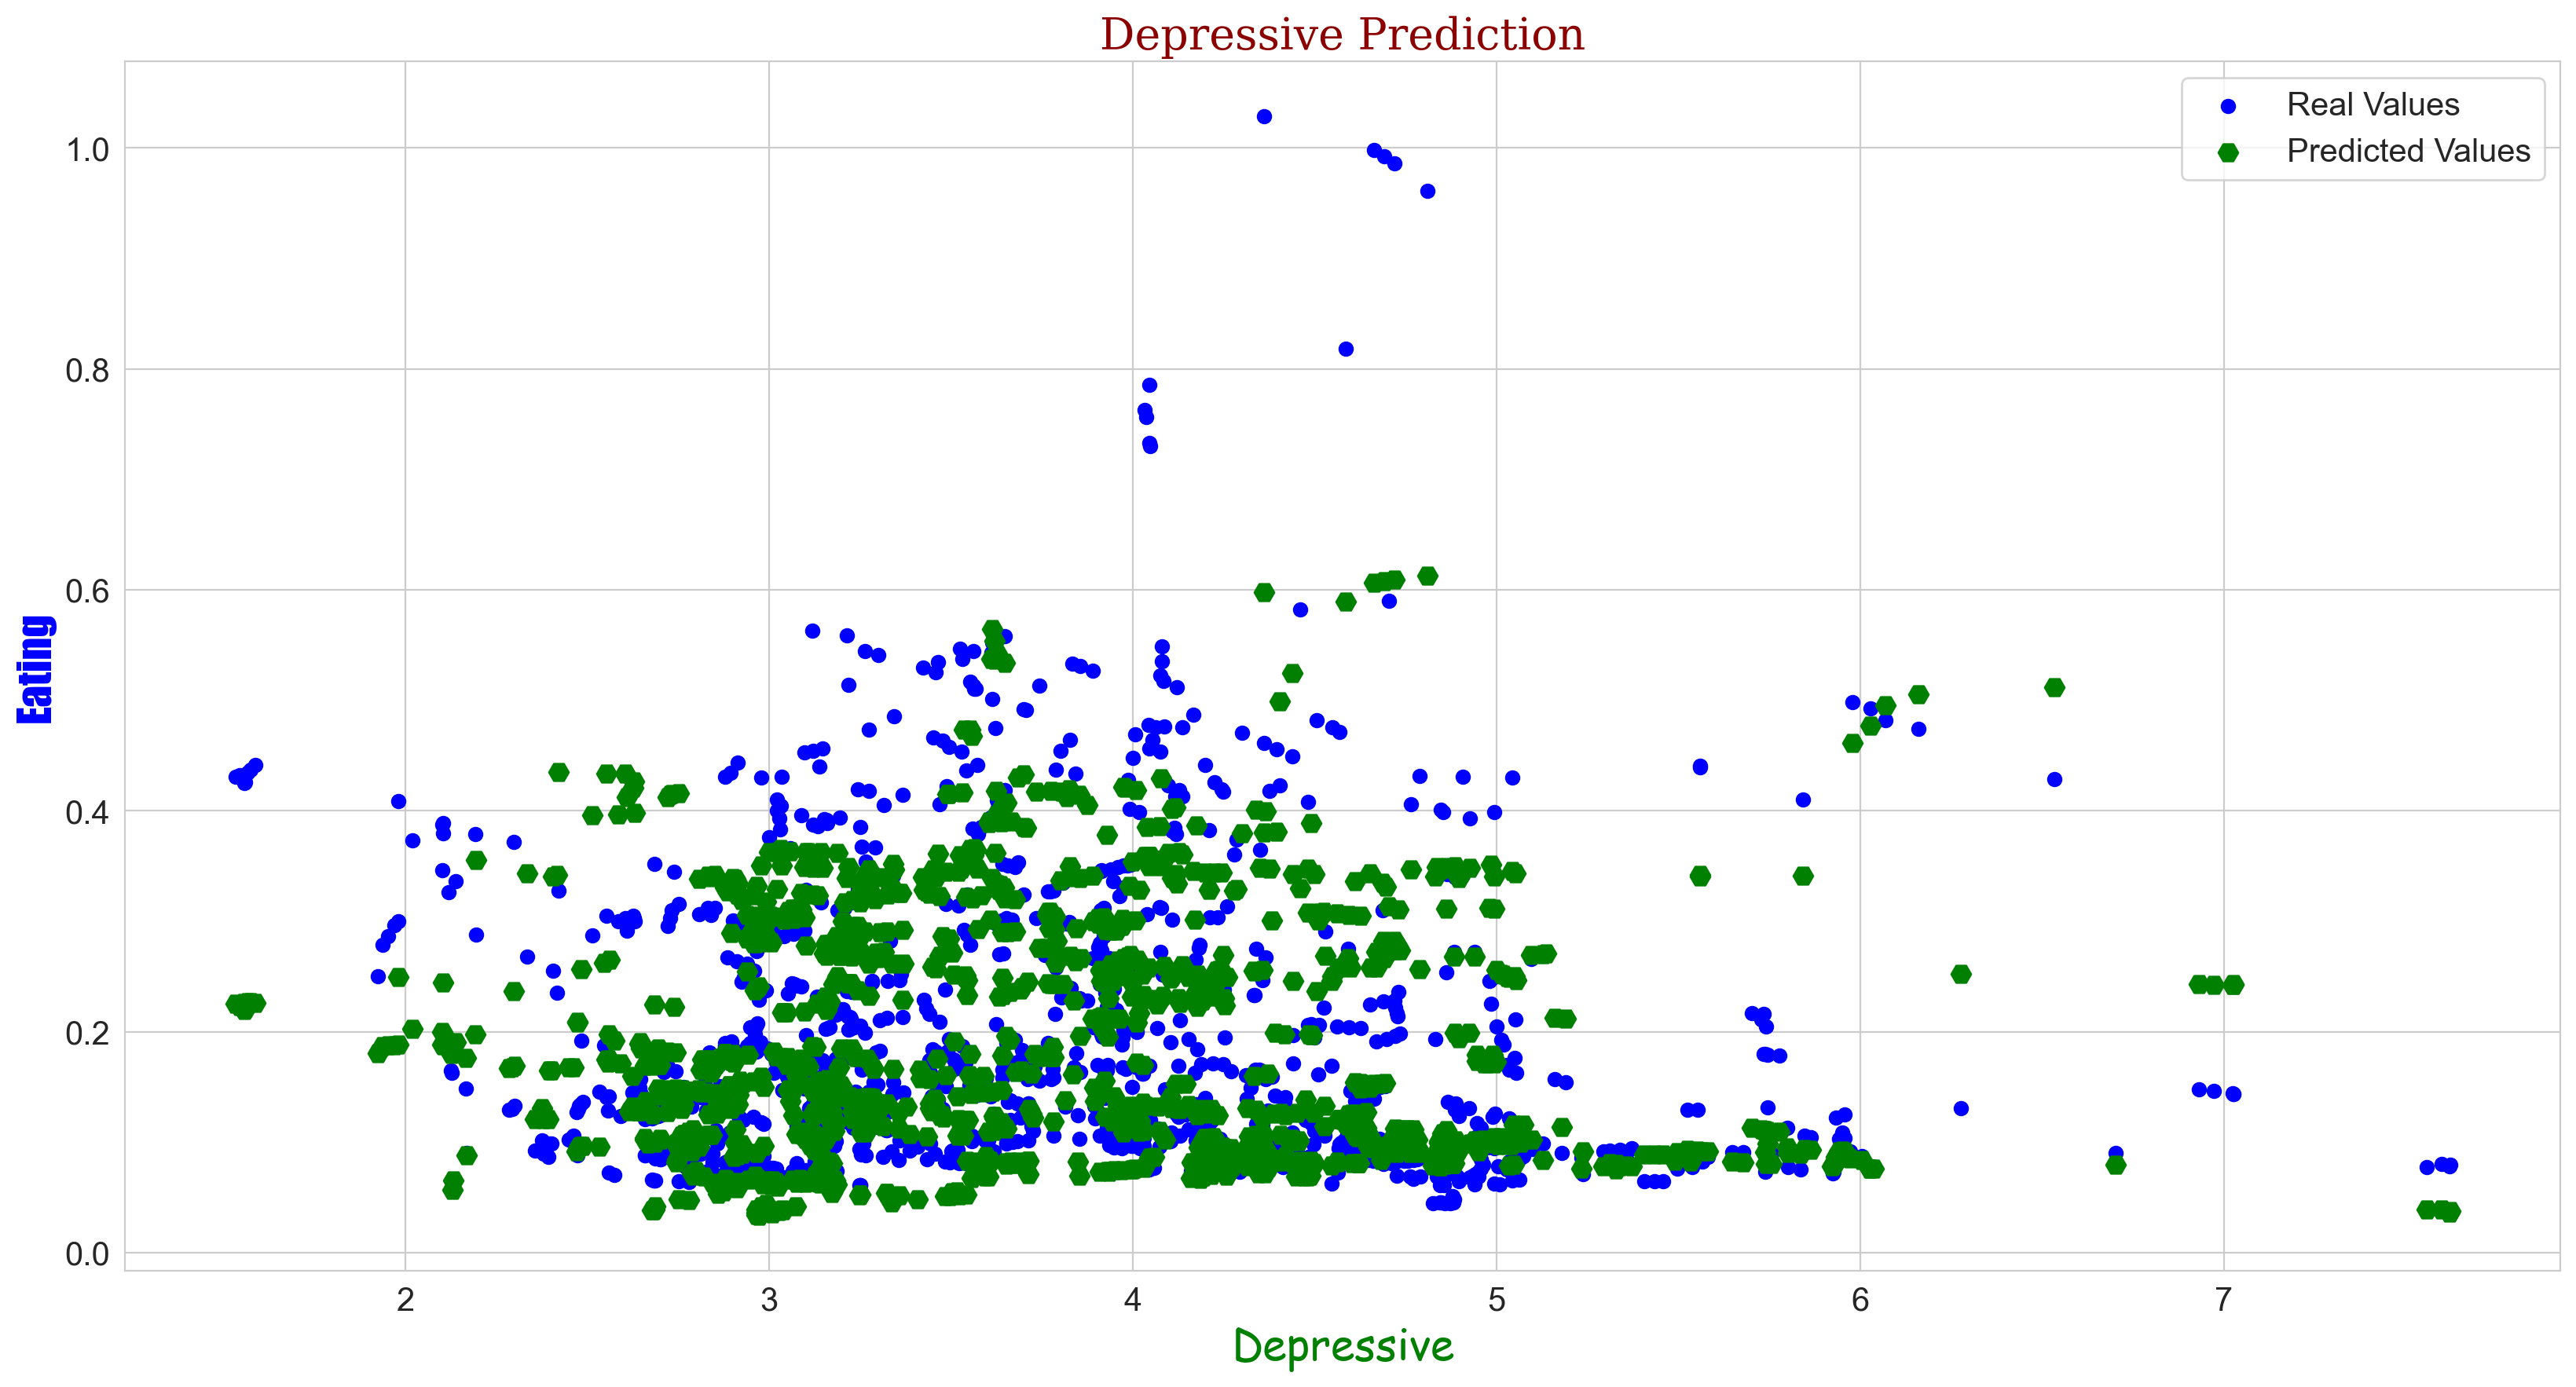

In [57]:
plt.figure(figsize= (20,10), dpi=200)
plt.title("Depressive Prediction",fontdict=font2)
plt.xlabel("Depressive",fontdict= font3)
plt.ylabel("Eating",fontdict=font1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a3,b3, color = 'blue', label = "Real Values")
plt.scatter(c3,d3, color = 'green', label = "Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
plt.show()

# 16- Conclusion

<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#5642C5;
           font-size:120%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 50px;
              color:white;">As we have seen, the maximum regression accuracy for this model was almost 70%. Since correlation between variables is very important in a regression project, perhaps the required correlation was not present in this dataset. I think the use of clustering and PCA or even SOM can give a good result in this data set.
thank you for your attention.
If this notebook was useful for you, please vote for this notebook. Good luck✔

</p>
</div>
